## Classificação de imagens

Neste exemplo, treinaremos um regressor softmax para classificar imagens contendo dígitos escritos à mão.

In [1]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

In [2]:
# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

### Carregando a base de dados.

+ Usaremos uma base de dados baixada pelo SciKit-Learn que contém 1797 imagens de dígitos escritos à mão.

+ Cada imagem é representada por uma matriz com 8x8 pixels em tons de cinza.

+ O conjunto possui 10 classes, os dígitos de 0 à 9.

**IMPORTANTE**

+ A função `load_digits` baixa a base de dados e retorna a matriz de atributos e os respectivos rótulos.
+ Cada matriz representando um imagem é **achatada**, resultando em um vetor com 64 (8x8) atributos.

In [3]:
# Load digits dataset, where each example is a flattened 8x8 image of a digit.
X, y = load_digits(return_X_y=True)

### Exibindo alguns dos exemplos.

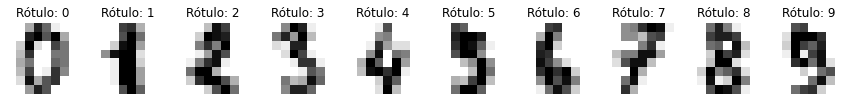

In [4]:
# Display the first 10 digits.
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Rótulo: {label}')

### Criando os conjuntos de treinamento e validação.

In [5]:
# Split the data set.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

### Treinando o regressor softmax

+ A classe `LogisticRegression` usa a abordagem **um-contra-o-resto** por **padrão** quando se treina com conjuntos com mais de duas classes, mas pode-se definir o parâmetro `multi_class` como `multinomial` para alternar para a **regressão softmax**.
+ O parâmetro `max_iter` configura o número máximo de iterações para que o *solver* escolhido convirja.

In [6]:
# Instantiate LogisticRegression object.
model = LogisticRegression(multi_class='multinomial',
                           max_iter=3000,
                           random_state=seed)

# Train model.
model.fit(x_train, y_train)

LogisticRegression(max_iter=3000, multi_class='multinomial', random_state=42)

### Realizando predições.

+ Usamos o conjunto de validação.

In [7]:
# Predict.
y_pred = model.predict(x_test)

### Cálculo da acurácia do classificador.

+ Usamos o conjunto de validação.

In [8]:
print("Accuracy of Logistic Regression model is: %1.2f %%" % (accuracy_score(y_test, y_pred)*100))

Accuracy of Logistic Regression model is: 97.22 %


### Plotando a matriz de confusão.

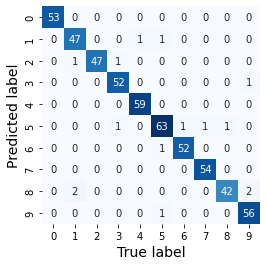

In [9]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(0,10), yticklabels=range(0,10), cmap="Blues")
plt.xlabel('True label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.show()